In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train_df = pd.read_json("train.json")
test_df = pd.read_json("test.json")

In [3]:
# dropping features that are not going to be used
#train_df.drop(['latitude', 'longitude', 'photos'],axis = 1, inplace = True)
#test_df.drop(['latitude', 'longitude', 'photos'],axis = 1, inplace = True)
train_df.head(40)

,bathrooms,bedrooms,building_id,created,description,display_address,features,interest_level,latitude,listing_id,longitude,manager_id,photos,price,street_address
10,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],medium,40.7145,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000,792 Metropolitan Avenue
10000,1.0,2,c5c8a357cba207596b04d1afd1e4f130,2016-06-12 12:19:27,,Columbus Avenue,"[Doorman, Elevator, Fitness Center, Cats Allow...",low,40.7947,7150865,-73.9667,7533621a882f71e25173b27e3139d83d,[https://photos.renthop.com/2/7150865_be3306c5...,5465,808 Columbus Avenue
100004,1.0,1,c3ba40552e2120b0acfc3cb5730bb2aa,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",W 13 Street,"[Laundry In Building, Dishwasher, Hardwood Flo...",high,40.7388,6887163,-74.0018,d9039c43983f6e564b1482b273bd7b01,[https://photos.renthop.com/2/6887163_de85c427...,2850,241 W 13 Street
100007,1.0,1,28d9ad350afeaab8027513a3e52ac8d5,2016-04-18 02:22:02,Building Amenities - Garage - Garden - fitness...,East 49th Street,"[Hardwood Floors, No Fee]",low,40.7539,6888711,-73.9677,1067e078446a7897d2da493d2f741316,[https://photos.renthop.com/2/6888711_6e660cee...,3275,333 East 49th Street
100013,1.0,4,0,2016-04-28 01:32:41,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,[Pre-War],low,40.8241,6934781,-73.9493,98e13ad4b495b9613cef886d79a6291f,[https://photos.renthop.com/2/6934781_1fa4b41a...,3350,500 West 143rd Street
100014,2.0,4,38a913e46c94a7f46ddf19b756a9640c,2016-04-19 04:24:47,,West 18th Street,[],medium,40.7429,6894514,-74.0028,b209e2c4384a64cc307c26759ee0c651,[https://photos.renthop.com/2/6894514_9abb8592...,7995,350 West 18th Street
100016,1.0,2,3ba49a93260ca5df92fde024cb4ca61f,2016-04-27 03:19:56,Stunning unit with a great location and lots o...,West 107th Street,"[prewar, elevator, Dogs Allowed, Cats Allowed,...",low,40.8012,6930771,-73.9660,01287194f20de51872e81f660def4784,[https://photos.renthop.com/2/6930771_7e3622b6...,3600,210 West 107th Street
100020,2.0,1,0372927bcb6a0949613ef5bf893bbac7,2016-04-13 06:01:42,"This huge sunny ,plenty of lights 1 bed/2 bath...",West 21st Street,"[Doorman, Elevator, Pre-War, Terrace, Laundry ...",low,40.7427,6867392,-73.9957,e6472c7237327dd3903b3d6f6a94515a,[https://photos.renthop.com/2/6867392_b18283f6...,5645,155 West 21st Street
100026,1.0,1,a7efbeb58190aa267b4a9121cd0c88c0,2016-04-20 02:36:35,<p><a website_redacted,Hamilton Terrace,"[Cats Allowed, Dogs Allowed, Elevator, Laundry...",medium,40.8234,6898799,-73.9457,c1a6598437b7db560cde66e5a297a53f,[https://photos.renthop.com/2/6898799_3759be4c...,1725,63 Hamilton Terrace
100027,2.0,4,0,2016-04-02 02:58:15,This is a spacious four bedroom with every bed...,522 E 11th,"[Dishwasher, Hardwood Floors]",low,40.7278,6814332,-73.9808,23a01ea7717b38875f5b070282d1b9d2,[https://photos.renthop.com/2/6814332_e19a8552...,5800,522 E 11th


In [4]:
train_df.shape

(49352, 15)

In [5]:
test_df.shape

(74659, 14)

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49352 entries, 10 to 99994
Data columns (total 15 columns):
bathrooms          49352 non-null float64
bedrooms           49352 non-null int64
building_id        49352 non-null object
created            49352 non-null object
description        49352 non-null object
display_address    49352 non-null object
features           49352 non-null object
interest_level     49352 non-null object
latitude           49352 non-null float64
listing_id         49352 non-null int64
longitude          49352 non-null float64
manager_id         49352 non-null object
photos             49352 non-null object
price              49352 non-null int64
street_address     49352 non-null object
dtypes: float64(3), int64(3), object(9)
memory usage: 6.0+ MB


In [7]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74659 entries, 0 to 99999
Data columns (total 14 columns):
bathrooms          74659 non-null float64
bedrooms           74659 non-null int64
building_id        74659 non-null object
created            74659 non-null object
description        74659 non-null object
display_address    74659 non-null object
features           74659 non-null object
latitude           74659 non-null float64
listing_id         74659 non-null int64
longitude          74659 non-null float64
manager_id         74659 non-null object
photos             74659 non-null object
price              74659 non-null int64
street_address     74659 non-null object
dtypes: float64(3), int64(3), object(8)
memory usage: 8.5+ MB


We see that there are no missing values in the dataframes.

### Data Visualization:

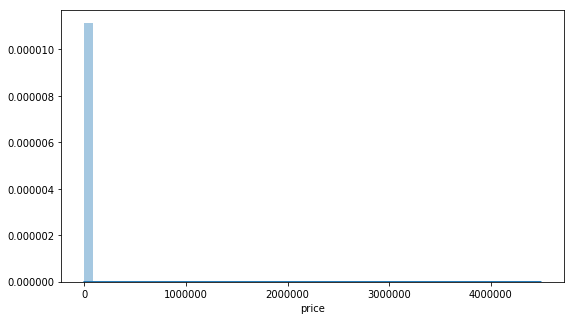

In [8]:

fig, ax = plt.subplots(figsize=(9,5))
sns.distplot(train_df['price'], ax=ax)

There seem to be some outliers, so let's deal with those.

In [9]:
new_train_df = train_df.drop(train_df[(train_df['price'] > 20000)].index)
print('A total number of ' + str(train_df.shape[0] - new_train_df.shape[0]) + ' outliers were removed.')

A total number of 109 outliers were removed.


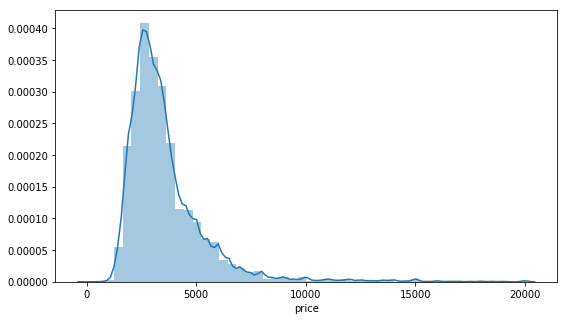

In [10]:

fig, ax = plt.subplots(figsize=(9,5))
sns.distplot(new_train_df['price'], ax=ax)

The bulk of the data prices are below 10000.

Text(0.5,1,'Price Vs Interest_level')

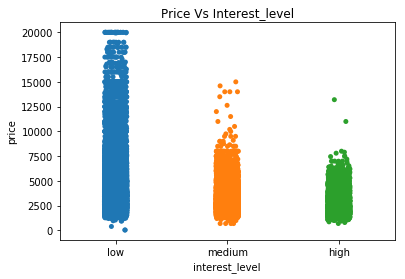

In [11]:
order = ['low', 'medium', 'high']
sns.stripplot(new_train_df["interest_level"],new_train_df["price"],jitter=True,order=order)
plt.title("Price Vs Interest_level")

Text(0.5,1,'Bathrooms Vs Interest_level')

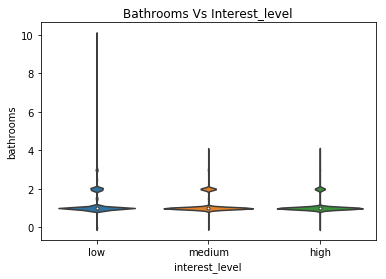

In [12]:
sns.violinplot(new_train_df["interest_level"],new_train_df["bathrooms"],order=order)
plt.title("Bathrooms Vs Interest_level")

Text(0.5,1,'Bedrooms Vs Interest_level')

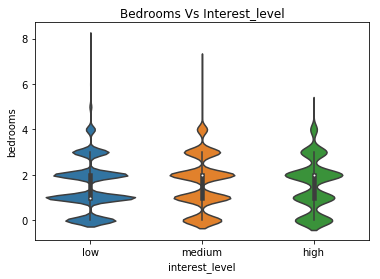

In [13]:
sns.violinplot(new_train_df["interest_level"],new_train_df["bedrooms"],order=order)
plt.title("Bedrooms Vs Interest_level")

Text(0.5,1,'Bedrooms Vs Price')

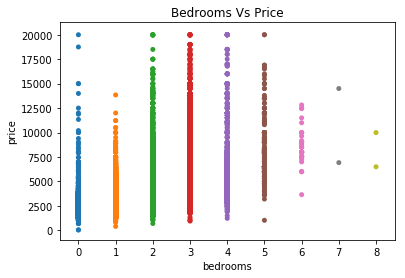

In [14]:
sns.stripplot(new_train_df["bedrooms"],new_train_df["price"])
plt.title("Bedrooms Vs Price")

Text(0.5,1,'Bathrooms Vs Price')

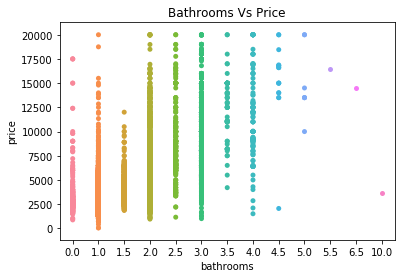

In [15]:
sns.stripplot(new_train_df["bathrooms"],new_train_df["price"])
plt.title("Bathrooms Vs Price")

Text(0.5,1,'Listing Id Vs Interest_level')

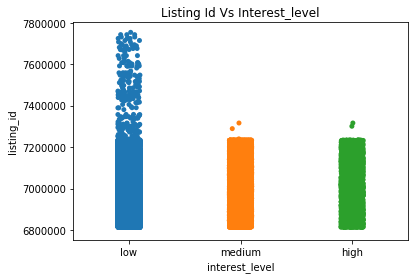

In [16]:
sns.stripplot(new_train_df["interest_level"],new_train_df["listing_id"],jitter=True,order=order)
plt.title("Listing Id Vs Interest_level")

Above certain value of listing ID interest is extremely low.

In [17]:
train_df["created"] = pd.to_datetime(train_df["created"])
train_df["date_created"] = train_df["created"].dt.date
#cnt_srs = train_df['date_created'].value_counts()
train_df['date_created']

10        2016-06-24
10000     2016-06-12
100004    2016-04-17
100007    2016-04-18
100013    2016-04-28
100014    2016-04-19
100016    2016-04-27
100020    2016-04-13
100026    2016-04-20
100027    2016-04-02
100030    2016-04-14
10004     2016-06-03
100044    2016-04-19
100048    2016-04-09
10005     2016-06-01
100051    2016-04-18
100052    2016-04-22
100053    2016-04-19
100055    2016-04-20
100058    2016-04-09
100062    2016-04-12
100063    2016-04-07
100065    2016-04-13
100066    2016-04-17
10007     2016-06-07
100071    2016-04-27
100075    2016-04-25
100076    2016-04-22
100079    2016-04-21
100081    2016-04-26
             ...    
99915     2016-04-25
99917     2016-04-26
99919     2016-04-08
99921     2016-04-29
99923     2016-04-05
99924     2016-04-24
99931     2016-04-25
99933     2016-04-03
99935     2016-04-19
99937     2016-04-14
9994      2016-06-06
99953     2016-04-26
99956     2016-04-16
99960     2016-04-05
99961     2016-04-22
99964     2016-04-29
99965     201

In [18]:
train_df['listing_id']

10        7211212
10000     7150865
100004    6887163
100007    6888711
100013    6934781
100014    6894514
100016    6930771
100020    6867392
100026    6898799
100027    6814332
100030    6869199
10004     7102986
100044    6895442
100048    6846213
10005     7089402
100051    6889043
100052    6913348
100053    6894111
100055    6900220
100058    6848536
100062    6858062
100063    6836760
100065    6866830
100066    6885927
10007     7120132
100071    6933499
100075    6921632
100076    6913084
100079    6907079
100081    6925264
           ...   
99915     6921019
99917     6926146
99919     6844805
99921     6943991
99923     6822618
99924     6918969
99931     6921162
99933     6819357
99935     6893263
99937     6873182
9994      7114685
99953     6924210
99956     6884807
99960     6825168
99961     6911061
99964     6942494
99965     6819478
99966     6878391
99979     6871559
99980     6933865
99982     6837242
99984     6815109
99986     6871681
99987     6856001
99988     

In [19]:
cnt_srs = train_df.groupby('display_address')['display_address'].count()
for i in [2, 10, 50, 100, 500]:
    print('Display_address that appear less than {} times: {}%'.format(i, round((cnt_srs < i).mean() * 100, 2)))

Display_address that appear less than 2 times: 63.22%
Display_address that appear less than 10 times: 89.6%
Display_address that appear less than 50 times: 97.73%
Display_address that appear less than 100 times: 99.26%
Display_address that appear less than 500 times: 100.0%


In [20]:
train_df["num_photos"] = train_df["photos"].apply(len)
cnt_srs = train_df['num_photos'].value_counts()
train_df['num_photos'].loc[train_df['num_photos']>12] = 12

D:\Anaconda\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


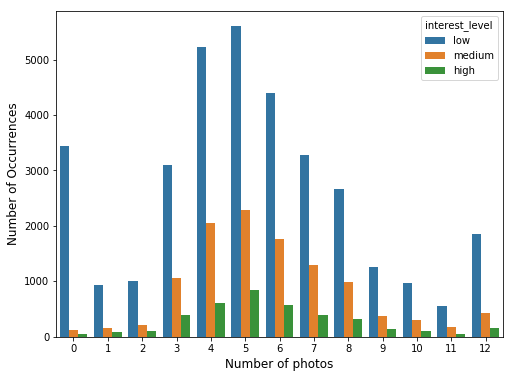

In [21]:
order = ['low', 'medium', 'high']
plt.figure(figsize=(8,6))
sns.countplot(x='num_photos', hue='interest_level', data=train_df, hue_order=order)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Number of photos', fontsize=12)
plt.show()

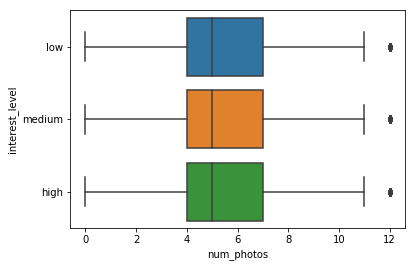

In [22]:
ax = sns.boxplot(x="num_photos", y="interest_level", data=train_df, order=order)

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
D:\Anaconda\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


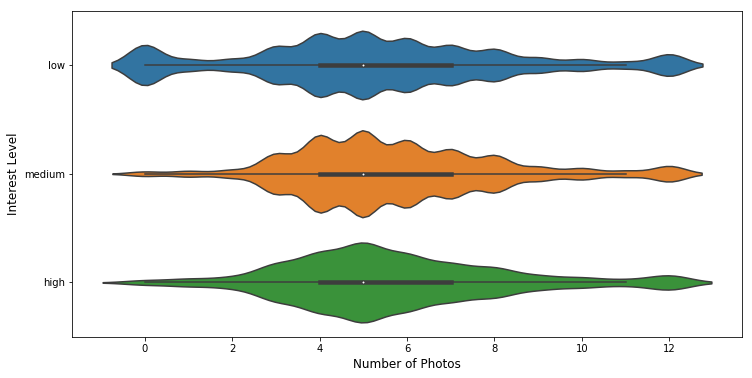

In [23]:
train_df['num_photos'].ix[train_df['num_photos']>12] = 12
plt.figure(figsize=(12,6))
sns.violinplot(x="num_photos", y="interest_level", data=train_df, order =['low','medium','high'])
plt.xlabel('Number of Photos', fontsize=12)
plt.ylabel('Interest Level', fontsize=12)
plt.show()

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until
D:\Anaconda\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


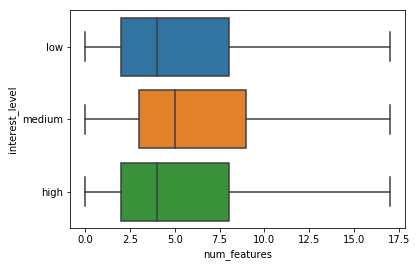

In [24]:
train_df["num_features"] = train_df["features"].apply(len)
cnt_srs = train_df['num_features'].value_counts()
train_df['num_features'].ix[train_df['num_features']>17] = 17

ax = sns.boxplot(x="num_features", y="interest_level", data=train_df, order=order)

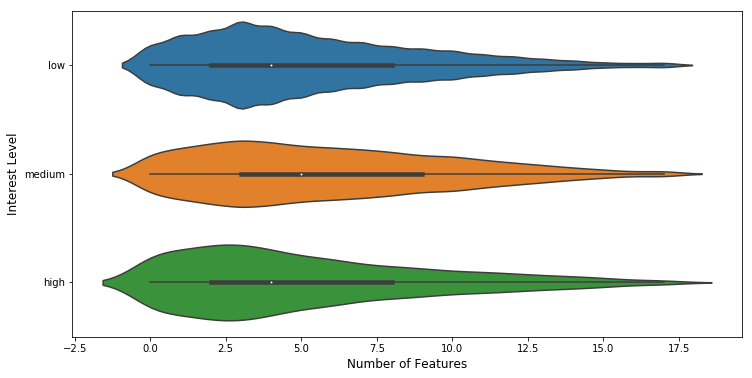

In [25]:
plt.figure(figsize=(12,6))
sns.violinplot(x="num_features", y="interest_level", data=train_df, order =['low','medium','high'])
plt.xlabel('Number of Features', fontsize=12)
plt.ylabel('Interest Level', fontsize=12)
plt.show()

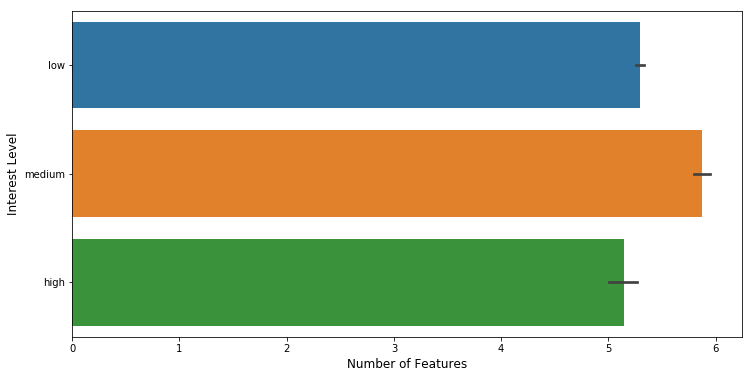

In [26]:
plt.figure(figsize = (12,6))
sns.barplot(x="num_features", y="interest_level", data=train_df, order =['low','medium','high'])
plt.xlabel('Number of Features', fontsize=12)
plt.ylabel('Interest Level', fontsize=12)
plt.show()

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
D:\Anaconda\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


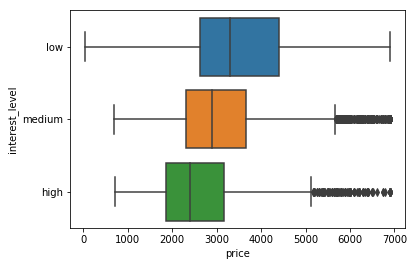

In [27]:
ulimit = np.percentile(train_df['price'].values, 95)
train_df['price'].ix[train_df['price']>ulimit] = ulimit

ax = sns.boxplot(y="interest_level", x="price", data=train_df, order=order)

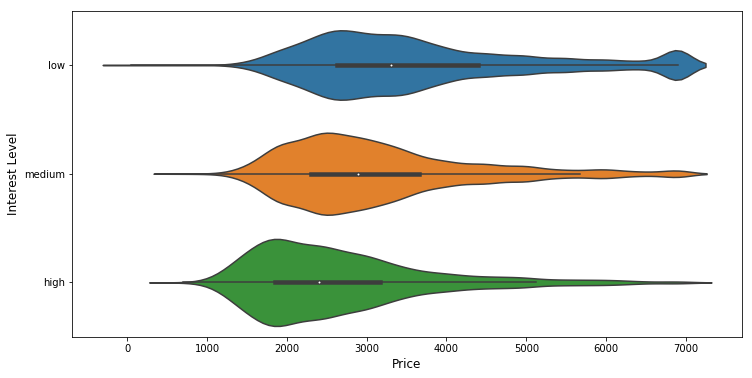

In [28]:
plt.figure(figsize=(12,6))
sns.violinplot(x="price", y="interest_level", data=train_df, order =['low','medium','high'])
plt.xlabel('Price', fontsize=12)
plt.ylabel('Interest Level', fontsize=12)
plt.show()

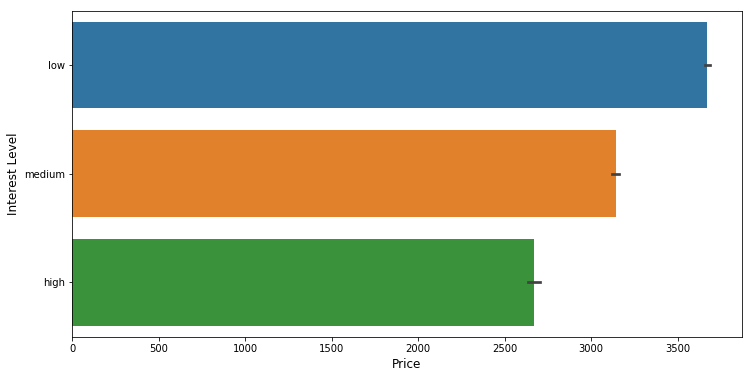

In [29]:
plt.figure(figsize = (12,6))
sns.barplot(x="price", y="interest_level", data=train_df, order =['low','medium','high'])
plt.xlabel('Price', fontsize=12)
plt.ylabel('Interest Level', fontsize=12)
plt.show()

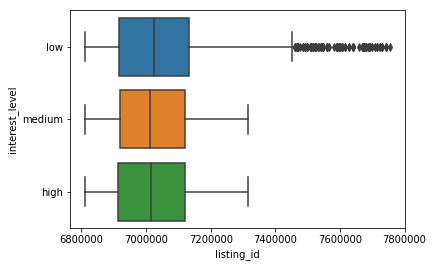

In [30]:
ax = sns.boxplot(x="listing_id", y="interest_level", data=train_df, order=order)

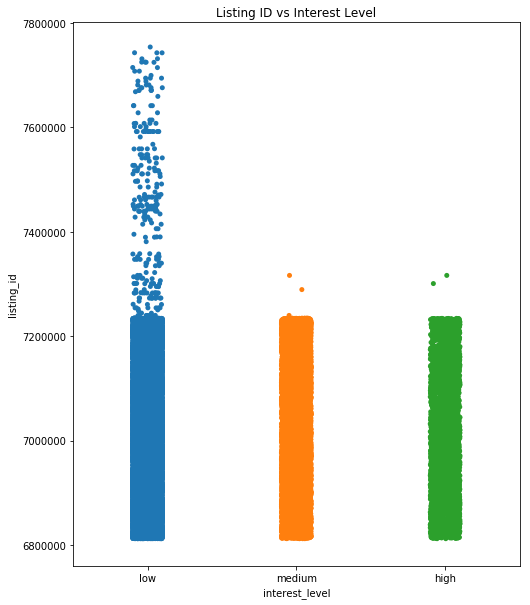

In [31]:
plt.figure(figsize=(8, 10))
plt.title("Listing ID vs Interest Level")
sns.stripplot(train_df['interest_level'],train_df['listing_id'],jitter=True, order=order)
plt.show()

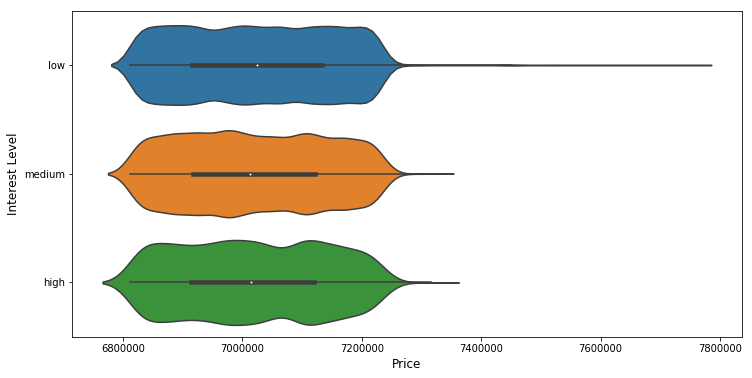

In [32]:
plt.figure(figsize=(12,6))
sns.violinplot(x="listing_id", y="interest_level", data=train_df, order =['low','medium','high'])
plt.xlabel('Price', fontsize=12)
plt.ylabel('Interest Level', fontsize=12)
plt.show()

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """
D:\Anaconda\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


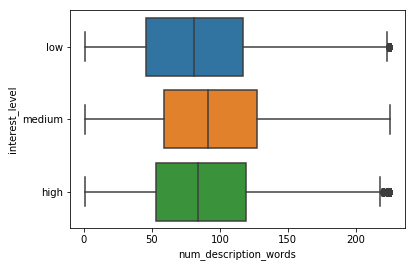

In [33]:
train_df["num_description_words"] = train_df["description"].apply(lambda x: len(x.split(" ")))
test_df["num_description_words"] = test_df["description"].apply(lambda x: len(x.split(" ")))

ulimit = np.percentile(train_df['num_description_words'].values, 97)
train_df['num_description_words'].ix[train_df['num_description_words']>ulimit] = ulimit

ax = sns.boxplot(x="num_description_words", y="interest_level", data=train_df, order=order)

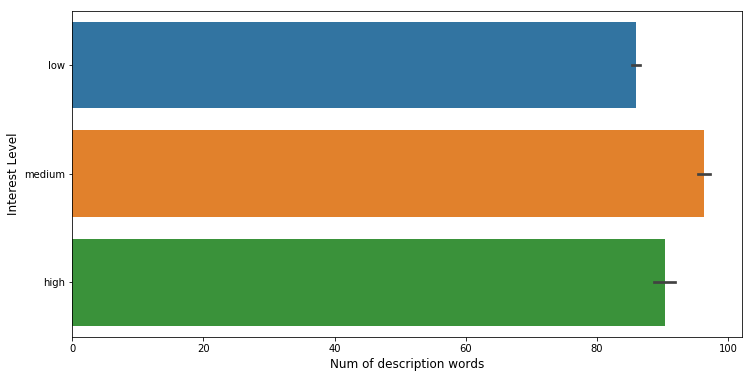

In [34]:
plt.figure(figsize = (12,6))
sns.barplot(x="num_description_words", y="interest_level", data=train_df, order =['low','medium','high'])
plt.xlabel('Num of description words', fontsize=12)
plt.ylabel('Interest Level', fontsize=12)
plt.show()

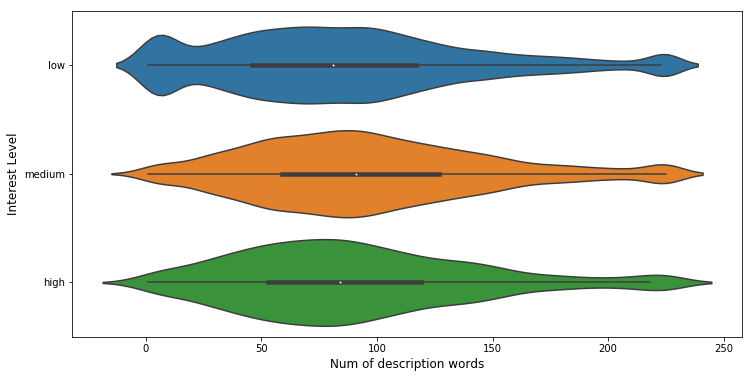

In [35]:
plt.figure(figsize=(12,6))
sns.violinplot(x="num_description_words", y="interest_level", data=train_df, order =['low','medium','high'])
plt.xlabel('Num of description words', fontsize=12)
plt.ylabel('Interest Level', fontsize=12)
plt.show()

In [36]:
# convert the created column to datetime object so as to extract more features 
train_df["created"] = pd.to_datetime(train_df["created"])
test_df["created"] = pd.to_datetime(test_df["created"])

# Let us extract some features like year, month, day, hour from date columns #
train_df["created_year"] = train_df["created"].dt.year
test_df["created_year"] = test_df["created"].dt.year

train_df["created_month"] = train_df["created"].dt.month
test_df["created_month"] = test_df["created"].dt.month

train_df["created_day"] = train_df["created"].dt.day
test_df["created_day"] = test_df["created"].dt.day

train_df["created_hour"] = train_df["created"].dt.hour
test_df["created_hour"] = test_df["created"].dt.hour

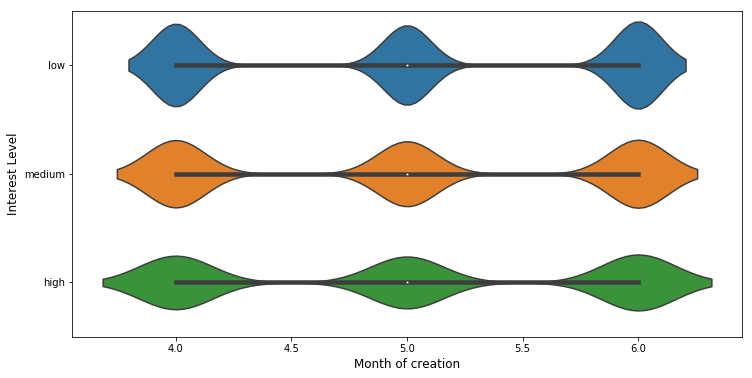

In [37]:
plt.figure(figsize=(12,6))
sns.violinplot(x="created_month", y="interest_level", data=train_df, order =['low','medium','high'])
plt.xlabel('Month of creation', fontsize=12)
plt.ylabel('Interest Level', fontsize=12)
plt.show()

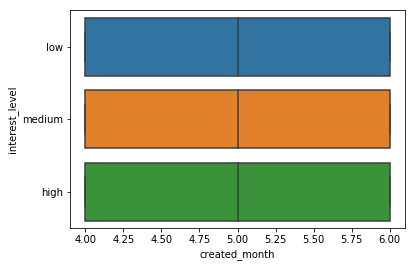

In [38]:
ax = sns.boxplot(x="created_month", y="interest_level", data=train_df, order=order)

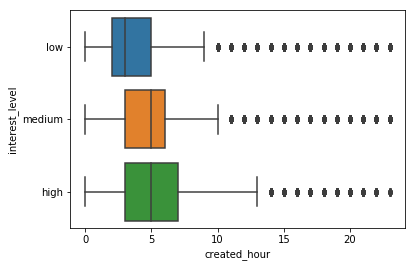

In [39]:
ax = sns.boxplot(x="created_hour", y="interest_level", data=train_df, order=order)

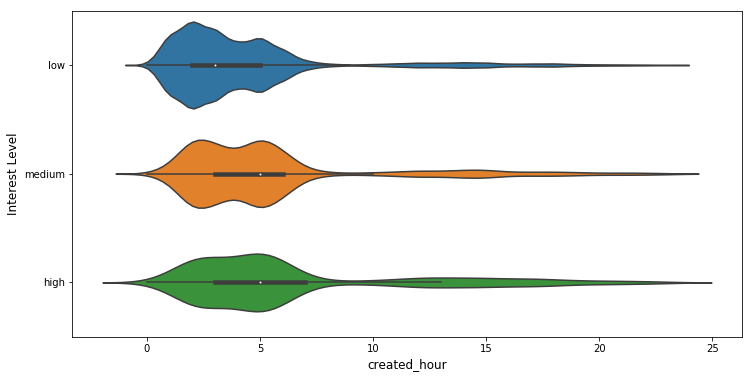

In [40]:
plt.figure(figsize=(12,6))
sns.violinplot(x="created_hour", y="interest_level", data=train_df, order =['low','medium','high'])
plt.xlabel('created_hour', fontsize=12)
plt.ylabel('Interest Level', fontsize=12)
plt.show()

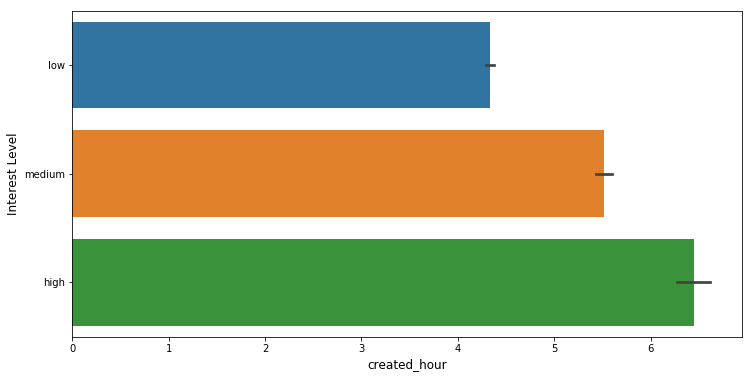

In [41]:
plt.figure(figsize = (12,6))
sns.barplot(x="created_hour", y="interest_level", data=train_df, order =['low','medium','high'])
plt.xlabel('created_hour', fontsize=12)
plt.ylabel('Interest Level', fontsize=12)
plt.show()

In [42]:
train_df['features'] = train_df["features"].apply(lambda x: " ".join(["_".join(i.split(" ")) for i in x]))
test_df['features'] = test_df["features"].apply(lambda x: " ".join(["_".join(i.split(" ")) for i in x]))
print(train_df["features"].head())
tfidf = CountVectorizer(stop_words='english', max_features=200)
tr_sparse = tfidf.fit_transform(train_df["features"])
te_sparse = tfidf.transform(test_df["features"])

10                                                         
10000     Doorman Elevator Fitness_Center Cats_Allowed D...
100004    Laundry_In_Building Dishwasher Hardwood_Floors...
100007                               Hardwood_Floors No_Fee
100013                                              Pre-War
Name: features, dtype: object


NameError: name 'CountVectorizer' is not defined